In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

**1. Load the dataset into a pandas dataframe. Name the variable as “survey”**

In [ ]:
survey = pd.read_excel("/content/Sample_Survey.xlsx")


In [ ]:
df = pd.DataFrame(survey)

In [ ]:
survey.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


**2. How many samples were collected on each day?**

In [ ]:
survey['collection_date'].value_counts()

2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
Name: collection_date, dtype: int64

**3.What proportion of the total respondents were aged less than 45?**

In [ ]:
age = survey[survey['age'] < 45 ]

In [ ]:
data = age['age'].value_counts()
age_less = data.sum()
age_less


6399

In [ ]:
response = survey['response_id'].value_counts()
total_response = response.sum()
total_response

6867

In [ ]:
#proportion = people whose age is less than 45 / total respondents
proportion  = age_less/total_response
proportion

0.9318479685452162

**4.Create a new column in the dataframe “age_group”.**



In [ ]:
age_group = pd.DataFrame({'response_id':['1','2','3','4'],'age':['26','34','25','66'],'age_group':['25-40','25-40','25-40','55+']})
age_group

,response_id,age,age_group
0,1,26,25-40
1,2,34,25-40
2,3,25,25-40
3,4,66,55+


**5. How many samples were collected for each age-group? Which age-group had the most samples?**

In [ ]:
survey['age'].max()

99

In [ ]:
survey['age'].min()

18

In [ ]:
age_group = pd.cut(survey['age'] , bins = [18,25,40,55,99] , labels = ['18-25','25-40','40-55','55-99'])
age_group

0       25-40
1       25-40
2       18-25
3       25-40
4       18-25
        ...  
6862    18-25
6863    25-40
6864    18-25
6865    18-25
6866    25-40
Name: age, Length: 6867, dtype: category
Categories (4, object): ['18-25' < '25-40' < '40-55' < '55-99']

In [ ]:
#samples collected for each age group.
age_group.value_counts()

25-40    3423
18-25    2567
40-55     644
55-99     108
Name: age, dtype: int64

**6. What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?**

In [ ]:
data1 = survey[survey['Vote_Now'] == survey['Past_Vote']]
data1.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
9,10,2020-08-24,Urban,12th Pass,"₹ 20,000 - ₹ 30,000",RJD,RJD,Fully Dissatisfied,Fully Dissatisfied,26,Male,181,BC,0.713059
10,11,2020-08-24,Urban,12th Pass,"₹ 5,000 - ₹ 10,000",BJP,BJP,Somewhat Satisfied,Somewhat Dissatisfied,38,Male,181,EBC,3.850583


In [ ]:
final = data1[data1[data1['Vote_Now'] == data1['Past_Vote']]== 'RJD']
past_vote = final['Past_Vote'].value_counts()
vote_now = final['Vote_Now'].value_counts()

In [ ]:
past_vote

RJD    811
Name: Past_Vote, dtype: int64

In [ ]:
vote_now

RJD    811
Name: Vote_Now, dtype: int64

In [ ]:
#proportion  = RJD party in both Past_Vote and Vote_Now / total respondents
proportion1 = past_vote/total_response
proportion2 = vote_now/total_response
proportion1 ,  proportion2

(RJD    0.118101
 Name: Past_Vote, dtype: float64, RJD    0.118101
 Name: Vote_Now, dtype: float64)

**7. For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3**

In [ ]:
CM_Satisfy = survey[survey['CM_satisfaction'] == 'Fully Satisfied']
CM_Satisfy.head(5)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477
14,15,2020-08-24,Rural,Graduate,"₹ 1,50,000 & above",BJP,BJP,Fully Satisfied,Fully Dissatisfied,24,Male,199,Gen,0.226477
17,18,2020-08-24,Urban,Graduate,"₹ 5,000 - ₹ 10,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,39,Male,200,Gen,0.181242
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935


In [ ]:
fully_satisfy = CM_Satisfy['CM_satisfaction'].value_counts()
fully_satisfy

Fully Satisfied    721
Name: CM_satisfaction, dtype: int64

In [ ]:
#proportion = fully satified respondents / total respondents
proportion = fully_satisfy/total_response
proportion

Fully Satisfied    0.104995
Name: CM_satisfaction, dtype: float64

**8. In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA Create a line plot of the result with date on x axis and
proportions on the y axis.** 


In [ ]:
MLA_Satisfy = survey[survey['MLA_satisfaction'] == 'Fully Dissatisfied']
MLA_Satisfy.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
5,6,2020-08-24,Urban,Graduate,"₹ 20,000 - ₹ 30,000",Others,BJP,Somewhat Satisfied,Fully Dissatisfied,38,Male,178,Gen,0.382603
6,7,2020-08-24,Urban,Graduate,"BPL/Below ₹ 5,000",RJD,BJP,Fully Dissatisfied,Fully Dissatisfied,34,Male,172,BC,0.521283
8,9,2020-08-24,Urban,12th Pass,"BPL/Below ₹ 5,000",BJP,BJP,Fully Satisfied,Fully Dissatisfied,23,Male,181,Gen,0.226477


In [ ]:
fully_disatisfy = MLA_Satisfy['MLA_satisfaction'].value_counts()
fully_disatisfy

Fully Dissatisfied    4152
Name: MLA_satisfaction, dtype: int64

In [ ]:
#proportion = fully dissatified respondents / total respondents
proportion = fully_disatisfy/total_response
proportion

Fully Dissatisfied    0.604631
Name: MLA_satisfaction, dtype: float64

Text(0.5, 1.0, 'MLA fully dissatisfied')

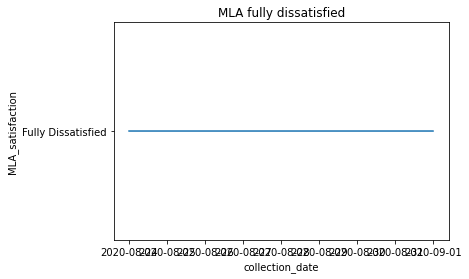

In [ ]:
sns.lineplot(x = 'collection_date' , y = 'MLA_satisfaction' , data = MLA_Satisfy).set_title("MLA fully dissatisfied")

**9. Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples**

In [ ]:
table = pd.pivot_table(data=survey,values=['response_id'],index=['Past_Vote'], columns=['Vote_Now'],aggfunc={'response_id':'count'})
table.head(10)

response_id                     ...                            
Vote_Now             AAP AIMIM     BJP  BSP  ...  RJJP  RLSP Undecided   VIP
Past_Vote                                    ...                            
BJP                  7.0   1.0  1630.0  3.0  ...  88.0  24.0      62.0  10.0
BSP                  NaN   1.0     2.0  5.0  ...   NaN   NaN       NaN   NaN
Did not vote         8.0   5.0   231.0  2.0  ...  20.0   3.0      31.0   5.0
HAM                  2.0   NaN    25.0  NaN  ...   4.0   NaN       1.0   NaN
INC                  NaN   6.0     6.0  NaN  ...   1.0   2.0       7.0   NaN
JAP(L)               NaN   NaN     4.0  NaN  ...   NaN   NaN       NaN   NaN
JD(U)                6.0  10.0   254.0  2.0  ...  13.0  25.0      36.0   6.0
LJP                  NaN   NaN    76.0  1.0  ...   1.0   NaN       1.0   NaN
Left Front           NaN   1.0     2.0  NaN  ...   NaN   1.0       NaN   1.0
NOTA                 NaN   1.0    29.0  1.0  ...   5.0   4.0       5.0   NaN

[10 rows x 18 columns]

**10. Repeat the above question with the cell values as the sum of “weight”**

In [ ]:
table = pd.pivot_table(data=survey,index=['Past_Vote'],values=['response_id','weight'],columns=['Vote_Now'],aggfunc={'weight':np.sum,'response_id':'count'})
table.head(10)

response_id                ...     weight                      
Vote_Now             AAP AIMIM     BJP  ...       RLSP  Undecided        VIP
Past_Vote                               ...                                 
BJP                  7.0   1.0  1630.0  ...  18.715113  41.286954  18.691691
BSP                  NaN   1.0     2.0  ...        NaN        NaN        NaN
Did not vote         8.0   5.0   231.0  ...   5.041587  22.015457  10.696552
HAM                  2.0   NaN    25.0  ...        NaN   0.039564        NaN
INC                  NaN   6.0     6.0  ...   1.140299   8.558475        NaN
JAP(L)               NaN   NaN     4.0  ...        NaN        NaN        NaN
JD(U)                6.0  10.0   254.0  ...  44.376194  58.137833  20.675288
LJP                  NaN   NaN    76.0  ...        NaN   1.709409        NaN
Left Front           NaN   1.0     2.0  ...   0.877960        NaN   3.020887
NOTA                 NaN   1.0    29.0  ...   4.502676   1.570309        NaN

[10 rows x 36 columns]

**11.Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.**

In [ ]:
df = pd.DataFrame(survey)

In [ ]:
bins = [18,25,40,55,99]
labels = ['18-25','25-40','40-55','55-99']
df['Age_group'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)
df['Age_group']

0       25-40
1       25-40
2       18-25
3       25-40
4       18-25
        ...  
6862    18-25
6863    25-40
6864    18-25
6865    18-25
6866    25-40
Name: Age_group, Length: 6867, dtype: category
Categories (4, object): ['18-25' < '25-40' < '40-55' < '55-99']

In [ ]:
df['Age_group'].value_counts()

25-40    3423
18-25    2692
40-55     644
55-99     108
Name: Age_group, dtype: int64

**12. Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.**

In [ ]:
df = pd.DataFrame(survey)

In [ ]:
data1 = df[df['Vote_Now'] == 'JD(U)']
data1.head(5)

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight,Age_group
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505,18-25
13,14,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",JD(U),BJP,Somewhat Satisfied,Fully Dissatisfied,29,Male,184,Gen,0.275509,25-40
28,29,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",JD(U),BJP,Fully Satisfied,Fully Satisfied,44,Male,205,BC,1.337935,40-55
29,30,2020-08-24,Urban,Professional Education,"₹ 1,50,000 & above",JD(U),JD(U),Somewhat Dissatisfied,Fully Dissatisfied,26,Male,172,BC,0.405708,25-40
59,60,2020-08-24,Rural,12th Pass,"₹ 5,000 - ₹ 10,000",JD(U),JD(U),Fully Satisfied,Fully Dissatisfied,48,Male,171,BC,2.824391,40-55


In [ ]:
bins = [18,25,40,55,99]
labels = ['18-25','25-40','40-55','55-99']
data1['Age_group'] = pd.cut(data1.age, bins, labels = labels,include_lowest = True)
data1['Age_group']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


4       18-25
13      25-40
28      40-55
29      25-40
59      40-55
        ...  
6769    40-55
6787    55-99
6829    40-55
6843    18-25
6862    18-25
Name: Age_group, Length: 526, dtype: category
Categories (4, object): ['18-25' < '25-40' < '40-55' < '55-99']

In [ ]:
data1['Age_group'].value_counts()

25-40    245
18-25    216
40-55     55
55-99     10
Name: Age_group, dtype: int64

**13.Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group**

In [ ]:
frames = [df['Age_group'],data1['Age_group']]
result = pd.concat(frames)
result

0       25-40
1       25-40
2       18-25
3       25-40
4       18-25
        ...  
6769    40-55
6787    55-99
6829    40-55
6843    18-25
6862    18-25
Name: Age_group, Length: 7393, dtype: category
Categories (4, object): ['18-25' < '25-40' < '40-55' < '55-99']

In [ ]:
result.value_counts()

25-40    3668
18-25    2908
40-55     699
55-99     118
Name: Age_group, dtype: int64